# Which tree species should the city plant?

## 📖 Background
You work for a nonprofit organization advising the planning department on ways to improve the quantity and quality of trees in New York City. The urban design team believes tree size (using trunk diameter as a proxy for size) and health are the most desirable characteristics of city trees.

The city would like to learn more about which tree species are the best choice to plant on the streets of Manhattan.

## 💾 The data
The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

#### Tree Census
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

#### Neighborhoods' geographical information
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
trees = pd.read_csv('data/trees.csv')
trees

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
0,190422,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770046,-73.984950
1,190426,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770210,-73.985338
2,208649,9,OnCurb,American linden,Alive,Good,No,Yes,No,No,No,No,No,No,No,10019,MN15,Clinton,40.762724,-73.987297
3,193310,14,OnCurb,honeylocust,Alive,Good,No,No,Yes,No,No,Yes,No,No,Yes,10021,MN40,Upper East Side-Carnegie Hill,40.772171,-73.960456
4,199760,4,OnCurb,willow oak,Alive,Fair,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.782087,-73.980964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64224,208765,11,OnCurb,honeylocust,Alive,Good,No,No,Yes,No,No,No,No,No,No,10065,MN31,Lenox Hill-Roosevelt Island,40.763224,-73.960984
64225,170513,9,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10280,MN25,Battery Park City-Lower Manhattan,40.707884,-74.017598
64226,190040,10,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.786150,-73.971152
64227,191269,12,OnCurb,ginkgo,Alive,Good,No,No,No,No,No,No,No,No,No,10010,MN21,Gramercy,40.739270,-73.983960


In [9]:
neighborhoods = gpd.read_file('data/nta.shp')
neighborhoods

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."
...,...,...,...,...,...,...,...,...
190,2.0,Bronx,005,BX63,West Concourse,1.936954e+07,28550.700370,"POLYGON ((-73.91192 40.84326, -73.91194 40.843..."
191,4.0,Queens,081,QN17,Forest Hills,5.782845e+07,36183.607828,"POLYGON ((-73.83103 40.71434, -73.83115 40.714..."
192,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.116850e+08,490146.604020,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ..."
193,4.0,Queens,081,QN03,Springfield Gardens South-Brookville,4.326375e+07,45266.267875,"POLYGON ((-73.75763 40.66645, -73.75756 40.666..."


## 📖 Executive Summary
* Most common tree species in Manhattan, New York:
  * Honeylocust
  * Callery Pear
  * Ginkgo
  * Pin Oak
  * Sophora
  * London Planetree
  * Japanese Zelkova
  * Littleleaf Linden
  * American Elm
  * American Linden
**** **** 
* Neighborhoods with most trees in Manhattan, New York:
  * Upper West Side
  * Upper East Side-Carnegie Hill
  * West Village
  * Central Harlem North-Polo Grounds
  * Hudson Yards-Chelsea-Flatiron-Union Square
  * Washington Heights South
  * Morningside Heights
  * Central Harlem South
  * Washington Heights North
  * East Harlem North
**** ****
* Recommended tree species city should plant, keeping in focus the desired characteristics of trees by Urban Design Team:
  * Weeping Willow
  * White Pine
  * Siberian Elm
  * Black Maple
  * Ohio Buckeye
  * Sycamore Maple
  * Tree of Heaven
  * Smoketree
  * Mulberry
  * Willow Oak
  
 These recommended trees are analyzed on the basis of health, total counts and size of trees. Additionaly, these tree species are great choices in terms of diversity.

## What are the most common tree species in Manhattan?

In [10]:
print('There are ',trees['spc_common'].nunique(),' tree species in Manhattan.\nThe most common tree species are:')
pd.DataFrame({'Total Trees':trees['spc_common'].value_counts().sort_values(ascending=False)})

There are  128  tree species in Manhattan.
The most common tree species are:


,Total Trees
honeylocust,13176
Callery pear,7297
ginkgo,5859
pin oak,4584
Sophora,4453
...,...
spruce,1
Osage-orange,1
red pine,1
Persian ironwood,1


## Which are the neighborhoods with the most trees?

In [11]:
print('There are ',trees['nta_name'].nunique(),' neighborhoods in Manhattan.\nNeighborhoods with the most trees are:')
pd.DataFrame({'Trees':trees['nta_name'].value_counts().sort_values(ascending=False)})

There are  28  neighborhoods in Manhattan.
Neighborhoods with the most trees are:


,Trees
Upper West Side,5807
Upper East Side-Carnegie Hill,4616
West Village,3801
Central Harlem North-Polo Grounds,3469
Hudson Yards-Chelsea-Flatiron-Union Square,2931
Washington Heights South,2924
Morningside Heights,2704
Central Harlem South,2643
Washington Heights North,2612
East Harlem North,2505


## A visualization of Manhattan's neighborhoods and tree locations.

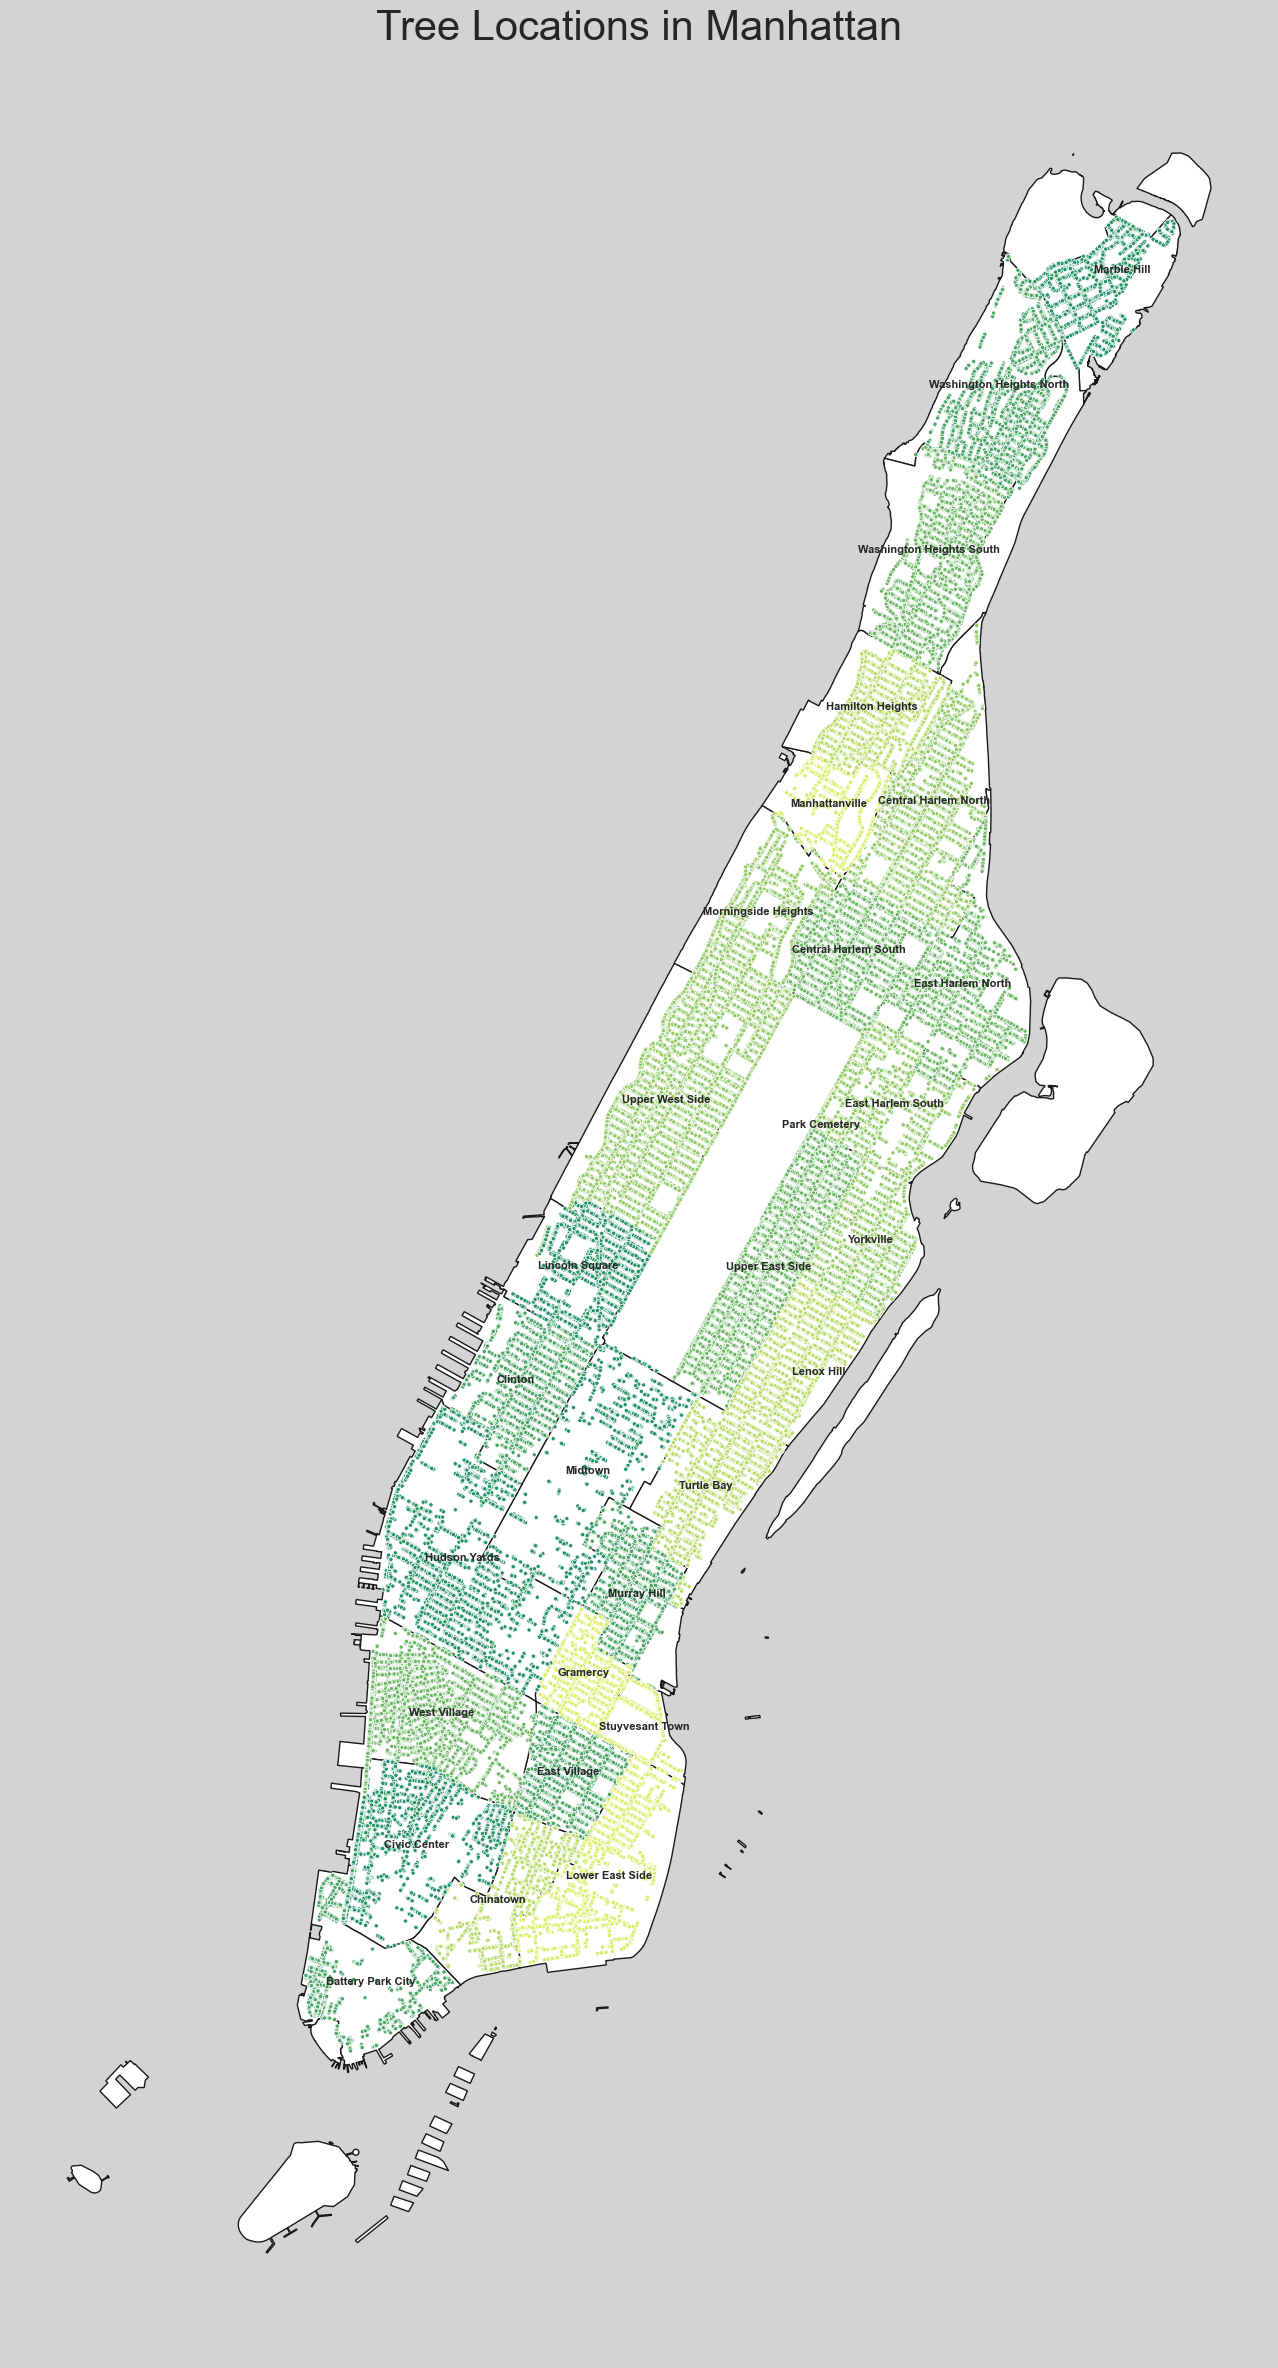

In [12]:
# Correcting a few neighorhoods name by renaming them
neighborhoods = neighborhoods.replace({'SoHo-TriBeCa-Civic Center-Little Italy':'Civic Center','park-cemetery-etc-Manhattan':'Park Cemetery'})
neighborhoods['ntaname'] = neighborhoods['ntaname'].str.split('-',1).str[0]

# Filtering the information regarding to Manhattan
n = (neighborhoods['boroname'] == 'Manhattan')

# Plot by using geometry points provided and tree locations in Manhattan
fig, ax = plt.subplots(figsize=(30,30))
neighborhoods[n].plot(ax=ax, facecolor='white', edgecolor='k',alpha=1, linewidth=1)
neighborhoods[n].apply(lambda x: ax.annotate(text=x['ntaname'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, weight='bold'), axis=1)
ax.set_axis_off()
plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
plt.title('Tree Locations in Manhattan',fontsize=30)
palette = sns.color_palette("summer")
sns.scatterplot(ax=ax, x='longitude', y='latitude', data=trees, hue='nta_name', marker='.', palette=palette, legend=False)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgrey'})
plt.show()

## What ten tree species would you recommend the city plant in the future?

Tree size and health are most desirable characteristics as believed by Urban Design Team.

Dataset shown below, displays the average diameter of each tree species alongside the number of poor trees in Manhattan.

In [13]:
t = trees.dropna(axis=0)
Health = {'Good': 0, 'Fair': 0, 'Poor':1}
t=t.replace({'health':Health});
poor = t.groupby('spc_common')['health'].sum()
avg_diameter = t.groupby('spc_common')['tree_dbh'].mean()
total = t['spc_common'].value_counts()
data = {'average_diameter':avg_diameter, 'poor_trees':poor, 'total_trees':total}
info_tree = pd.DataFrame(data)
info_tree

,average_diameter,poor_trees,total_trees
'Schubert' chokecherry,4.901840,12,163
American beech,5.227273,3,22
American elm,13.899293,78,1698
American hophornbeam,8.345238,8,84
American hornbeam,5.164706,5,85
...,...,...,...
weeping willow,13.500000,0,12
white ash,9.800000,2,50
white oak,5.240664,23,241
white pine,13.000000,0,1


Have a look on correlation between number of poor trees and total trees!

In [14]:
from scipy import stats
stats.pearsonr(info_tree['poor_trees'],info_tree['total_trees'])

PearsonRResult(statistic=0.7701287531939647, pvalue=2.2901866378990444e-26)

* Poor trees are much less than fair and good trees. Also, strong correlation between poor trees and total trees shows that there will be more poor trees with increase in trees. 
* Planting tree species with less counts is a good idea in terms of diversity.
* Keeping these insights and demanding characteristics on front, trees with larger diameter (tree size) and less counts are most preferred.
****  ****
* Recommended tree species to plant in near future:
1. Weeping Willow
2. White Pine
3. Siberian Elm
4. Black Maple
5. Ohio Buckeye
6. Sycamore Maple
7. Tree of Heaven
8. Smoketree
9. Mulberry
10. Willow Oak
